### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
shape_info = data.shape
data_types = data.dtypes
missing_values = data.isnull().sum()
shape_info, data_types, missing_values
#car seems to be mostly null, five others contain roughly 1% null

((12684, 26),
 destination             object
 passanger               object
 weather                 object
 temperature              int64
 time                    object
 coupon                  object
 expiration              object
 gender                  object
 age                     object
 maritalStatus           object
 has_children             int64
 education               object
 occupation              object
 income                  object
 car                     object
 Bar                     object
 CoffeeHouse             object
 CarryAway               object
 RestaurantLessThan20    object
 Restaurant20To50        object
 toCoupon_GEQ5min         int64
 toCoupon_GEQ15min        int64
 toCoupon_GEQ25min        int64
 direction_same           int64
 direction_opp            int64
 Y                        int64
 dtype: object,
 destination                 0
 passanger                   0
 weather                     0
 temperature                 0
 time         

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
data = data.drop('car', axis=1)
data.dropna(inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [8]:
#Since accept is 1 and not accept is 0 we can simply take the average of the Y column 

proportion_accepted = data['Y'].mean()

proportion_accepted

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

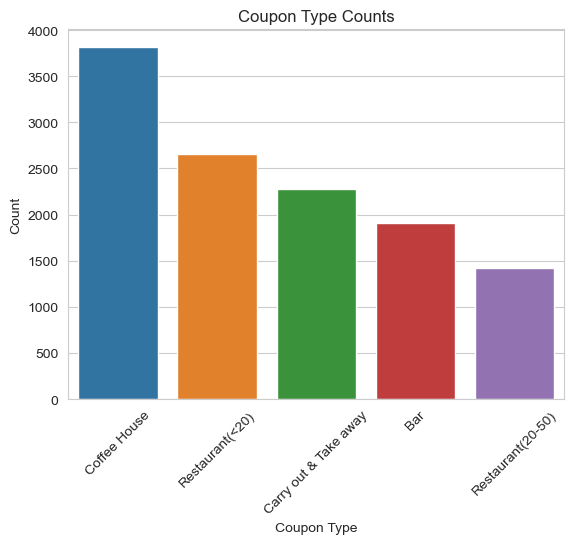

In [13]:
coupon_counts = data['coupon'].value_counts()
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.title('Coupon Type Counts')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

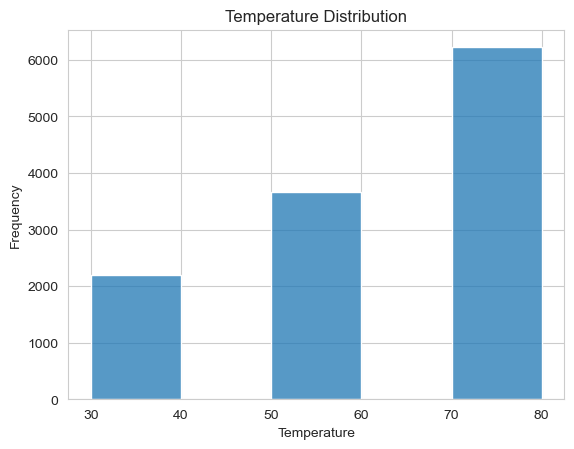

In [15]:
sns.histplot(data['temperature'], bins=5)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
bar_coupons = data[data['coupon'] == 'Bar']

bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [17]:
proportion_accepted_bar = bar_coupons['Y'].mean()

proportion_accepted_bar

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [26]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons['Bar_Frequency_Category'] = 'More than 3'  # Default to "More than 3"
bar_coupons.loc[bar_coupon_data['Bar'].isin(['never', 'less1', '1~3']), 'Bar_Frequency_Category'] = '3 or fewer'
acceptance_rate_by_bar_frequency_category = bar_coupons.groupby('Bar_Frequency_Category')['Y'].mean()
acceptance_rate_by_bar_frequency_category


C:\Users\msha247\AppData\Local\Temp\ipykernel_44328\4001558462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Bar_Frequency_Category'] = 'More than 3'  # Default to "More than 3"


Bar_Frequency_Category
3 or fewer     0.372674
More than 3    0.761658
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [39]:
def categorize_driver(row):
    age_over_25 = row['age'] not in ['21', 'below21']  # Exclude '21' and 'below21'
    bar_more_than_once = row['Bar'] not in ['never', 'less1']  # Exclude 'never' and 'less1'
    return 'Target Group' if age_over_25 and bar_more_than_once else 'Others'

bar_coupons['Driver_Category'] = bar_coupons.apply(categorize_driver, axis=1)

acceptance_rates = bar_coupons.groupby('Driver_Category')['Y'].mean()

acceptance_rates

C:\Users\msha247\AppData\Local\Temp\ipykernel_44328\2808635449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Driver_Category'] = bar_coupons.apply(categorize_driver, axis=1)


Driver_Category
Others          0.337748
Target Group    0.689826
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [40]:
def categorize_driver_advanced(row):
    bar_more_than_once = row['Bar'] not in ['never', 'less1']  
    no_kids_as_passengers = row['passanger'] != 'Kid(s)'  
    occupation_other_than_farm_fish_forestry = row['occupation'] not in ['Farming Fishing & Forestry'] 

    return 'Target Group' if (bar_more_than_once and no_kids_as_passengers and occupation_other_than_farm_fish_forestry) else 'Others'

bar_coupons['Advanced_Driver_Category'] = bar_coupons.apply(categorize_driver_advanced, axis=1)

advanced_acceptance_rates = bar_coupons.groupby('Advanced_Driver_Category')['Y'].mean()

advanced_acceptance_rates

C:\Users\msha247\AppData\Local\Temp\ipykernel_44328\1479798710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Advanced_Driver_Category'] = bar_coupons.apply(categorize_driver_advanced, axis=1)


Advanced_Driver_Category
Others          0.297903
Target Group    0.709434
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [41]:
def categorize_driver_complex(row):
    condition_1 = (row['Bar'] not in ['never', 'less1']) and (row['passanger'] != 'Kid(s)') and (row['maritalStatus'] != 'Widowed')
    condition_2 = (row['Bar'] not in ['never', 'less1']) and (row['age'] in ['21', '26', 'below21'])
 
    condition_3 = (row['RestaurantLessThan20'] in ['4~8', 'gt8']) and (row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
    
    return 'Target Group' if condition_1 or condition_2 or condition_3 else 'Others'

bar_coupons['Complex_Driver_Category'] = bar_coupons.apply(categorize_driver_complex, axis=1)

complex_acceptance_rates = bar_coupons.groupby('Complex_Driver_Category')['Y'].mean()

complex_acceptance_rates


C:\Users\msha247\AppData\Local\Temp\ipykernel_44328\2471043828.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Complex_Driver_Category'] = bar_coupons.apply(categorize_driver_complex, axis=1)


Complex_Driver_Category
Others          0.299914
Target Group    0.587131
Name: Y, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [33]:
#Drivers who frequent bars are more likely to take the bar coupon. Other categorization increases probability but not that much. The program should focus bar coupons on people who got the bar a lot.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [42]:
#Let's look a the Coffee House coupons

ch_coupons = data[data['coupon'] == 'Coffee House']

ch_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Driver_Category,Advanced_Driver_Category,Complex_Driver_Category
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1,0,0,0,1,0,Others,Others,Others
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1,0,0,0,1,0,Others,Others,Others
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,1,1,0,0,1,0,Others,Others,Others
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1,1,0,0,1,0,Others,Others,Others
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1,0,0,0,1,0,Others,Others,Others


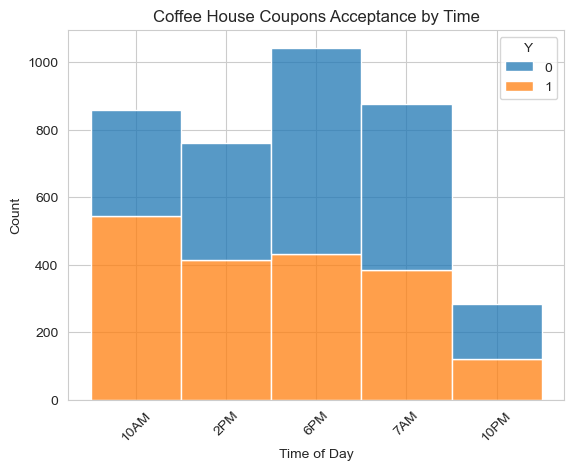

In [44]:
# Create a histogram for "Coffee House" coupons by time, differentiating between Y=1 and Y=0
sns.histplot(data=ch_coupons, x='time', hue='Y', multiple='stack', discrete=True)
plt.title('Coffee House Coupons Acceptance by Time')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

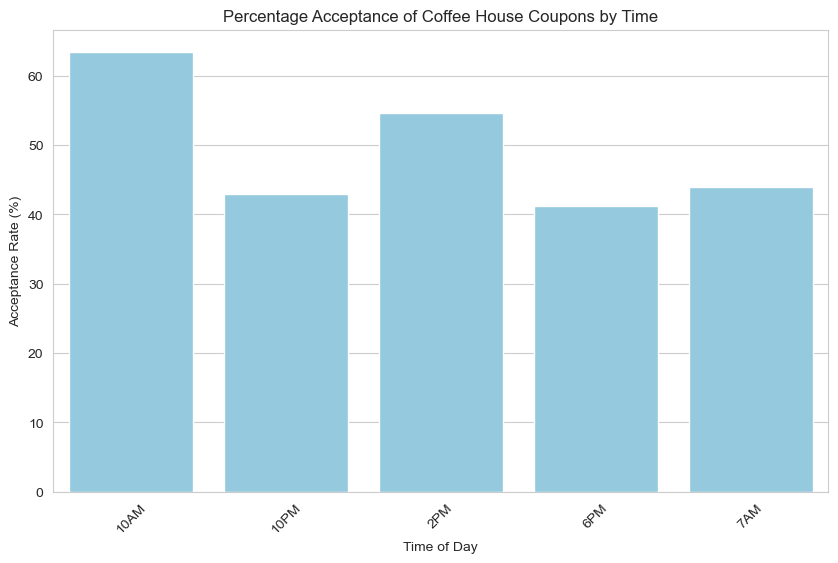

In [46]:
#show percentage acceptance of a Coffee House coupon for each time

acceptance_rate_by_time = ch_coupons.groupby('time')['Y'].mean().reset_index()

# Convert acceptance rate to percentage
acceptance_rate_by_time['Y'] *= 100

# Create a bar plot for acceptance rates by time
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_rate_by_time, x='time', y='Y', color='skyblue')
plt.title('Percentage Acceptance of Coffee House Coupons by Time')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

#people are more likely to accept the coffee house coupon in the morning and early afternoon.  

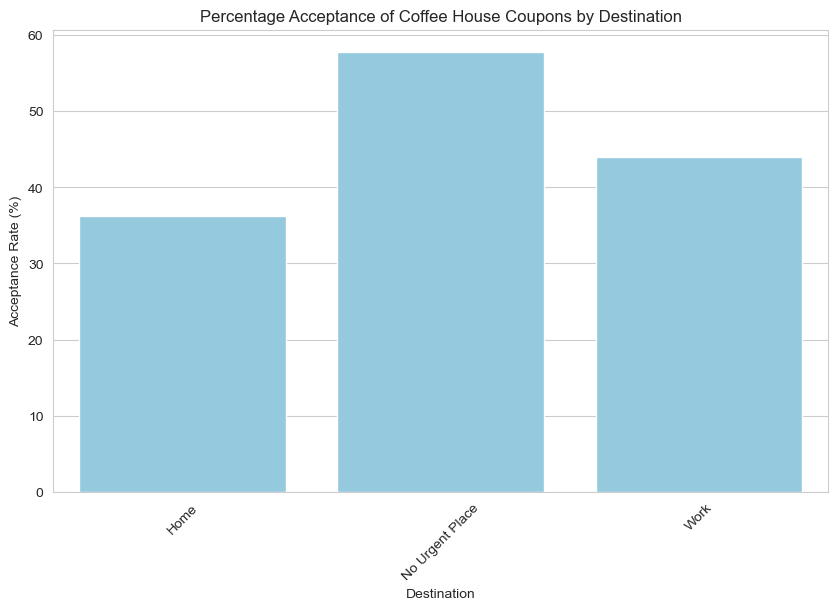

In [50]:
#show percentage acceptance of a Coffee House coupon for each destination

acceptance_rate_by_destination = ch_coupons.groupby('destination')['Y'].mean().reset_index()

# Convert acceptance rate to percentage
acceptance_rate_by_destination['Y'] *= 100

# Create a bar plot for acceptance rates by time
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_rate_by_destination, x='destination', y='Y', color='skyblue')
plt.title('Percentage Acceptance of Coffee House Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

#people are more likely to accept the coffee house coupon if they do not have a specific destination

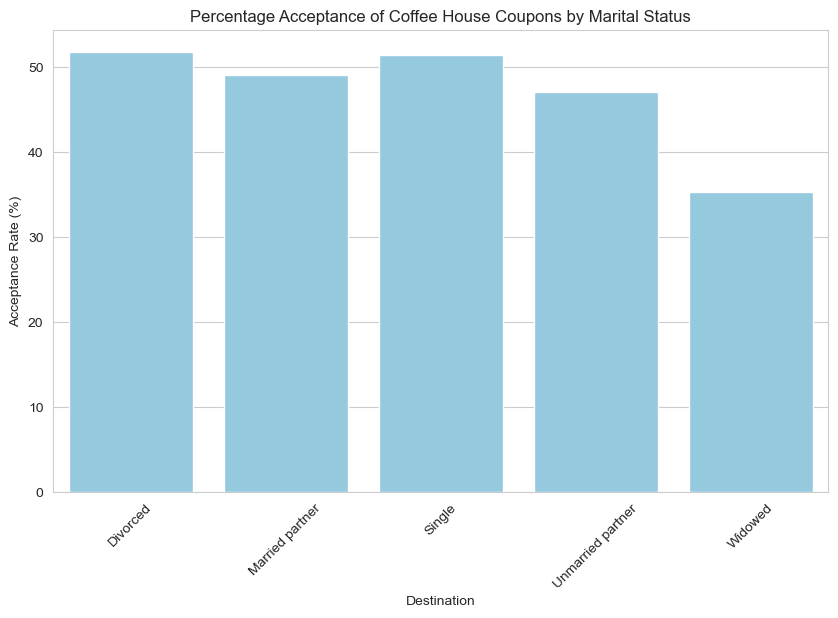

In [53]:
#show percentage acceptance of a Coffee House coupon by maritalStatus

acceptance_rate_by_maritalStatus = ch_coupons.groupby('maritalStatus')['Y'].mean().reset_index()

# Convert acceptance rate to percentage
acceptance_rate_by_maritalStatus['Y'] *= 100

# Create a bar plot for acceptance rates by maritalStatus
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_rate_by_maritalStatus, x='maritalStatus', y='Y', color='skyblue')
plt.title('Percentage Acceptance of Coffee House Coupons by Marital Status')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

